# Likninger og nullpunkter

```{admonition} Læringsutbytte
Etter å ha arbeidet med denne delen av emnet, skal du kunne:
1. forklare den teoretisk bakgrunnen for halveringsmetoden og Newtons metode
2. implementere halveringsmetoden og Newtons metode
3. drøfte feil og begrensninger ved metodene
4. bruke metodene til å finne nullpunkter og løse likninger
```

## Likninger
Å finne nullpunktene til en funksjon er det samme som å løse en likning $f(x) = 0$. Dersom vi for eksempel ønsker å løse en likning $x^4 + 3x = 2x^2 - 10$, kan vi løse denne ved å finne nullpunktet til funksjonen $f(x) = x^4 + 3x - 2x^2 + 10$. Vi kan si at vi formulerer likningen som et nullpunktsproblem.

Likninger kan løses med mange spesialiserte løsningsmetoder og algebraiske "triks", for eksempel kjenner vi en løsningsformel for andregradslikninger:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Denne funksjonen kan kun brukes til å løse andregradslikninger. Det kreves andre funksjoner for å løse likninger av tredje og fjerde grad, og likninger av femte grad og over er ikke analytisk løsbare. Når vi løser likninger numerisk på en datamaskin, bruker vi derimot generelle metoder som i prinsippet kan brukes på alle typer likninger.

Det finnes mange ulike måter å løse slike likninger på, og hver av metodene har sine styrker og svakheter. To metoder som er basert på relativt enkle prinsipper, er halveringsmetoden og Newtons metode. Vi skal se på implementering av disse metodene. I tillegg ser vi litt på styrker og svakheter ved metodene. Til slutt ser vi hvordan vi kan løse likninger ved å bruke ferdige algoritmer som finnes i scipy-biblioteket.

## Praktiske anvendelser

Det finnes flere praktiske anvendelser med likninger. Hvis vi for eksempel skal finne ut hvor to funksjoner skjærer hverandre, kan vi løse likningen $f(x) = g(x)$ som et nullpunktsproblem: $f(x) - g(x) = 0$. Disse funksjonene kan representere mange ulike ting.

La oss for eksempel si at vi har to uttrykk som for eksempel beskriver konsentrasjon til to produkter over tid:

$$c_1(t) = e^{-t} + t + 5$$

$$c_2(t) = \ln(0.006t + 1) + t^{0.3} + 10$$

For å finne ut ved hvilken tid de to produktene har lik konsentrasjon, kan vi løse likningen $c_1(t) = c_2(t)$. Formulert som et nullpunktsproblem får vi:

$$e^{-t} + t + 5 - \ln(0.006t + 1) - t^{0.3} - 10 = 0$$

Dette er en likning som ikke er analytisk løsbar. Her skal vi se på metoder for å finne nullpunktene til funksjoner. Dette er en strategi som også kan brukes til å løse likninger.

## Visualisere løsningen
Før vi løser likninger, kan det være lurt å visualisere funksjonene som representerer likningen. For eksempel kan vi plotte funksjonen $f(t) = e^{-t} + t + 5 - \ln(0.006t + 1) - t^{0.3} - 10$ og se hvor den skjærer _x_-aksen:

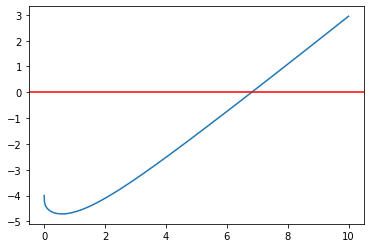

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,10,1000)
y = np.exp(-t) + t + 5 - np.log(0.006*t + 1) - t**0.3 - 10

plt.plot(t,y)
plt.axhline(y = 0, color = "red") # x-akse
plt.show()

Vi ser at grafen skjærer _x_-aksen i omtrent $x \approx 6.5$. Vi kan også plotte $c_1(t) = e^{-t} + t + 5$ og $c_2(t) = \ln(0.006t + 1) + t^{0.3} + 10$ i samme koordinatsystem for å se hvor de skjærer hverandre. Vi ser at dette gir samme estimat for _x_.

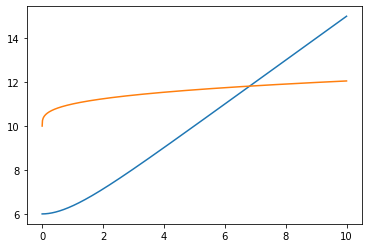

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,10,1000)
y1 = np.exp(-t) + t + 5 
y2 = np.log(0.006*t + 1) + t**0.3 + 10

plt.plot(t,y1)
plt.plot(t,y2)
plt.show()

## En enkel metode for å finne nullpunktet
Nå har vi en viss peiling på hvor nullpunktet befinner seg, som er løsningen på likninga. La oss prøve en veldig enkel metode for å finne dette nullpunktet. Metoden vi viser nå, brukes ikke i særlig grad, fordi den både er langsom og lite robust. Den er derimot ganske intuitiv og fin å starte med. La oss begynne med en pseudokode som beskriver algoritmen:

```{code-block} text
x = startverdi
y = f(x)
dx = steglengde (avstand mellom punktene vi vil sjekke)

gjenta så lenge y*y_forrige > 0: (det vil si inntil produktet er mindre enn 0).
    x_forrige = x
    x = x + dx

nullpunkt = (x+x_forrige)/2
skriv ut nullpunktet
```

```{admonition} Underveisoppgave
:class: tip
Tolk pseudokoden ovenfor og forklar hvordan algoritmen fungerer.
```

Vi kan illustrere metoden med følgende figur:

<img src="https://github.com/andreasdh/programmering-i-kjemi/blob/master/docs/bilder/brute_force_likninger.png?raw=true" width="500"/>

Vi beveger oss altså oppover (eller nedover) grafen ved å gradvis øke _x_-verdiene med en steglengde _dx_. Underveis sjekker vi om funksjonsverdien til de to _x_-verdiene (_x_ og _x + dx_) har motsatt fortegn. Dersom de har det, må nullpunktet ligge mellom de to _x_-verdiene. I figuren ser vi at $f(x_7)$ og $f(x_8)$ har motsatt fortegn, altså ligger nullpunktet mellom disse verdiene et sted. Ofte kan det være lurt å tippe på midtpunktet mellom de to, men her ser vi at det ikke stemmer helt – nullpunktet ligger svært nært $x_7$. Dette kan vi bøte på ved å velge en _dx_ som er mye mindre. Vi har valgt en stor avstand mellom _x_-verdiene i figuren for å gjøre den tydeligere, men du bør velge en _dx_ som er liten nok til å få et godt svar. Hva som er "liten nok" _dx_, er avhengig av funksjonen. Dette er en åpenbar svakhet med metoden.


```{admonition} Underveisoppgave
:class: tip
Vi kan implementere algoritmen som nedenfor. Fyll inn det som mangler.

<iframe src="https://trinket.io/embed/python3/7cd27a61af" width="100%" height="300" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
```

```{admonition} Løsningsforslag
:class: tip, dropdown
<iframe src="https://trinket.io/embed/python3/ba7775606b" width="100%" height="300" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
```

```{admonition} Underveisoppgave
:class: tip
Diskuter fordeler og svakheter med algoritmen ovenfor.
```

## Halveringsmetoden
La oss se på en annen metode for å finne nullpunkter og dermed løse likninger. Vi går rett til programkoden:

In [4]:
def f(x):
    return 2*x - 2

# Intervallet vi skal lete etter nullpunktet i
a = -5
b = 5

m = (a+b)/2 # Regner ut midtpunktet mellom a og b

while f(m) != 0:
    if f(a)*f(m) < 0:
        b = m
    elif f(b)*f(m) < 0:
        a = m
    m = (a+b)/2

print("Nullpunktet er x =", m)

Nullpunktet er x = 1.0


```{amonition} Underveisoppgave
:tip: tip
Forklar linje for linje hva programmet ovenfor gjør. Tegn en figur som illustrerer hvordan metoden fungerer.
```

Metoden som er brukt ovenfor, heter _halveringsmetoden_. Halveringsmetoden går ut på å velge et intervall $[a, b]$ der $f(a)$ og $f(b)$ har motsatte fortegn. Vi kan bruke grafen til å vurdere hvilket intervall som egner seg dersom vi plotter den først. Deretter skal vi finne et nytt intervall $[a, b]$ som er mindre, men slik at $f(a)$ og $f(b)$ fortsatt har motsatte fortegn. Det kan vi gjøre ved å finne midten mellom _a_ og _b_. Da får vi et punkt $m = (a + b)/2$, og vi kan finne $f(m)$. 

Vi undersøker så om $f(m_1) = 0$. Hvis ikke, evaluerer vi fortegnene til $f(a)$, $f(b)$ og $f(m)$. Dersom $f(a)$ og $f(m)$ har samme fortegn, setter vi det nye intervallet til $[m, b]$ fordi da må $f(m)$ og $f(b)$ ha motsatte fortegn. Motsatt setter vi intervallet til $[a, m]$ dersom $f(b)$ og $f(m)$ har samme fortegn. Prosessen gjentas _n_ ganger til vi har at $f(m_n) \approx 0$. Figuren nedenfor illustrerer metoden med to trinn

<img src="https://raw.githubusercontent.com/andreasdh/programmering-i-kjemi/master/docs/bilder/halveringsmetoden.png" width="500"/>

Algoritmen kan mer generelt beskrives slik:

```{admonition} Halveringsmetoden
La _f_ være en kontinuerlig funksjon med motsatte fortegn på funksjonsverdiene $f(a)$ og $f(b)$ i intervallet $[a,b]$. Da kan nullpunktene finnes slik:

1. Finn midtpunktet $c_k$ mellom punktene _a_ og _b_.
2. Undersøk hvilke av $f(a)$ og $f(b)$ som har motsatt fortegn til $f(c_k)$, og sett det nye intervallet til $[a,c_k]$ eller $[c_k, b]$, der start- og sluttverdien i intervallet skal ha motsatt fortegn.
3. Gjenta prosessen _n_ ganger til $f(c_k) \approx 0$.
```

### Forbedringer av metoden
Når vi bruker numeriske metoder, får vi sjeldent nøyaktige svar. Derfor er det aldri en god idé å undersøke hvorvidt $f(x) = 0$ helt nøyaktig. Vi bør heller sjekke om $f(x) \approx 0$. Dette kan vi gjøre med å innføre en _toleranse_ som forteller programmet hvor nærme nullpunktet vi vil være. Dette kan vi gjøre slik:

In [6]:
def f(x):
    return 2*x - 2

# Intervallet vi skal lete etter nullpunktet i
a = -5
b = 5
toleranse = 1E-8

m = (a+b)/2 # Regner ut midtpunktet mellom a og b

while abs(f(m)) >= toleranse:
    if f(a)*f(m) < 0:
        b = m
    elif f(b)*f(m) < 0:
        a = m
    m = (a+b)/2

print("Nullpunktet er x =", m)

Nullpunktet er x = 0.9999999962747097


```{amonition} Underveisoppgave
:class: tip
Hvorfor tar vi absoluttverdien til f(m) når vi skal sjekke om funksjonsverdien er nærmere 0 enn toleransen?
```

```{amonition} Underveisoppgave
:class: tip
Utvid programmet gradvis ved å legge til elementene nedenfor. Programmet skal
1. printe ut antall runder løkka går (det vil si antall _iterasjoner_).
2. stoppe dersom et visst antall iterasjoner er nådd.
3. pakkes inn i en Python-funksjon med _f_, _a_, _b_, _toleranse_ og maks antall iterasjoner som parametre. Funksjonen skal returnere antall iterasjoner og løsningen.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
Her ser du en mulig løsning der alle punktene ovenfor er lagt inn. I tillegg er det lagt inn en "docstring", altså en forklaring på hva funksjonen gjør øverst i funksjonen.
```{code-block} Python
def f(x):
    return x**2 - x -2

def halveringsmetoden(f,a,b,tol=1E-10,n=100):
    """
    Algoritme som benytter halveringsmetoden til å 
    finne nullpunktet til en funksjon f i intervallet [a,b].
    
    Parametre
    ---------
    f: funksjonen
    a: laveste x-verdi i intervallet
    b: høyeste x-verdi i intervallet
    tol: toleranseparameter/feilmargin
    n: maks antall iterasjoner
    
    Returnerer
    ----------
    m: nullpunktet
    i: antall iterasjoner brukt
    """
    i = 0
    m = (a+b)/2			# Finner første halveringspunkt
    while i < n and abs(f(m)) > tol:	
        if f(a)*f(m) < 0:
            b = m
        elif f(b)*f(m) < 0:
            a = m
        m = (a+b)/2
        i += 1
    return m, i

m, i = halveringsmetoden(f,-10,10)
print("Nullpunktet er x =", m, "og løkka gikk", i, "ganger.")
```
````

La oss nå se om vi kan benytte halveringsmetoden til å finne ut ved hvilken tid konsentrasjonen er lik i reaksjonene representert ved likningene vi startet med i dette kapitlet. Vi lager en litt enklere utgave av funksjonen i løsningsforslaget ovenfor, men vi legger i tillegg inn en standardverdi for toleransen (her $10^{-8}$). Det betyr at hvis vi ikke spesifiserer toleransen når vi kaller på funksjonen, vil toleransen automatisk settes til dette.

<iframe src="https://trinket.io/embed/python3/20dc1b3551" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

```{admonition} Oppgave
:class: tip
Test og studer programmet ovenfor og forklar hva som skjer. Modifiser programmet slik at det også plotter nullpunktet og funksjonen for å sjekke at løsningen stemmer.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
Du kan legge til følgende plottekommandoer for å visualisere løsningen:

```{code-block} Python
import matplotlib.pyplot as plt

x = np.linspace(0,20)
plt.axhline(y=0)
plt.plot(x,c(x)) # Plotter funksjonen
plt.plot(t,c(t), marker="o", color="red") # Plotter nullpunktet
plt.show()
```
````

## Newtons metode
Det finnes flere måter å løse likninger på. En metode som ofte fungerer godt, og som er mye raskere enn halveringsmetoden, er _Newtons metode_, også kalt _Newton-Raphsons metode_. Den bruker nullpunktet til _tangenten_ i et punkt på en funksjon _f_ som en tilnærming til nullpunktet til _f_. Metoden fungerer slik:

1. Vi velger oss først et startpunkt $x_0$ og regner ut nullpunktet til tangenten i $f(x_0)$. Dette punktet kaller vi $x_1$. 
2. Dersom $x_1$ tilsvarer nullpunktet til funksjonen $f$, sier vi oss ferdige. 
3. Hvis ikke, regner vi ut nullpunktet til en ny tangent i $f(x_1)$ og kaller det $x_2$. 
4. Slik fortsetter vi til vi er så nært nullpunktet til $f$ som vi ønsker. 

Figuren nedenfor viser to iterasjoner av metoden med funksjonen $f(x) = x^2 - x - 2$ og startgjett $x_0 = 5$:

<img src="https://github.com/andreasdh/programmering-i-kjemi/blob/master/docs/bilder/newtonsmetode.png?raw=true" width="500"/>

```{admonition} Underveisoppgave
:class: tip
Bruk figuren ovenfor til å forklare hvorfor Newtons metode konvergerer mot (går mot) nullpunktet raskt.
```

La oss utlede en algoritme for metoden. Stigningen til en linje kan gis ved:

$$a = \frac{\Delta y}{\Delta x} = \frac{f(x) - f(x_0)}{x - x_0}$$

Her setter vi $x$ til å være en variabel størrelse og $x_0$ til et fast punkt. Dersom vi gjør om dette til et uttrykk for linja $f(x)$, får vi følgende:

$$f(x) = f(x_0) + a(x - x_0)$$

Dette er likningen for ei linje som går igjennom punktet $(x_0, f(x_0))$. Siden den deriverte i et punkt er lik stigningen i det samme punktet, kan vi skrive:

$$f(x) = f(x_0) + f'(x_0)(x - x_0)$$

som er likningen til en tangent gjennom punktet $(x_0, f(x_0))$ på funksjonen $f$. Vi ønsker å finne nullpunktet til tangenten, og setter derfor $f(x) = 0$:

$$f(x_0) + f'(x_0)(x - x_0) = 0$$

Dersom vi omformer uttrykket slik at den ukjente er nullpunktet $x$, får vi:

$$x = x_0 - \frac{f(x_0)}{f'(x_0)}$$

Dette er Newtons metode. Siden vi ønsker å gjenta prosessen med å finne nullpunktene til tangentene i $(x_0, f(x_0))$, $(x_1, f(x_1))$, $(x_2, f(x_2))$ og så videre, kan vi formulere algoritmen iterativt:

```{admonition} Newtons metode
La _f_ være en kontinuerlig, deriverbar funksjon, og la $(x_n, f(x_n))$ være et punkt på funksjonen. Nullpunktet til funksjonen _f_ kan tilnærmes ved nullpunktet til den $n$-te tangenten til funksjonen. Bruk først et startgjett, $x_0$. Finn så nullpunktet $x_{n+1}$ til den $n$-te tangenten ved å bruke nullpunktet, $x_n$, til den forrige tangenten. Gjenta til $f(x_{n+1}) \approx 0$

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
```

```{admonition} Underveisoppgave
:class: tip
Bruk beskrivelsen ovenfor og prøv å implementere Newtons metode før du ser på hvordan vi gjør det nedenfor.
```

Vi ser at vi trenger den deriverte for å beregne nullpunktet. Det er en åpenbar ulempe ved metoden dersom den deriverte er vanskelig å finne. Vi kan bruke en tilnærming til den deriverte med numeriske metoder, men da får vi enda en feil i beregningen vår. En fordel med Newtons metode er at den konvergerer raskt mot nullpunktet, og at vi kun trenger å oppgi ett punkt som vi skal starte med. Halveringsmetoden konvergerer mer langsomt og trenger to punkter (et intervall) for å fungere. Hastigheten har lite å si når vi gjør så enkle beregninger som her, men dersom vi skal gjøre tunge beregninger, er Newtons metode, og varianter av denne, mye brukt.

Et annet problem med Newtons metode kan oppstå ved lokale ekstremalpunkter. Her kan metoden gi tangenter på hver sin side av for eksempel bunnpunktet, uten at de konvergerer mot nullpunktet. Vi kan for så vidt også få et problem dersom $f'(x) = 0$ et eller annet sted i iterasjonen, fordi vi da må dele på null i algoritmen. Dette oppstår ikke så ofte, men det kan være lurt å tenke på, spesielt med hensyn til startgjettet vårt.

Her er en enkel implementering av Newtons metode uten å pakke metoden inn i en funksjon:

In [11]:
def f(x):
    return 2*x - 2

def fder(x):
    return 2

toleranse = 1E-8
x = 0  # startgjett

while abs(f(x)) > toleranse:
    x = x - f(x)/fder(x)

print("Nullpunktet er x =", x)

Nullpunktet er x = 1.0


Hvis vi ønsker å lage en funksjon av Newtons metode, kan vi gjøre det slik:

In [12]:
def newtons_metode(f,fder,x,tol=1E-10):
    while abs(f(x)) > tol:
        x = x - f(x)/fder(x)
    return x

Både Newtons metode og halveringsmetoden er grunnleggende, men relativt robuste metoder som kan gi gode nok tilnærminger i mange tilfeller. Newtons metode er en såkalt _Householder-metode_ av første orden. Vi kan få enda bedre tilnærminger ved å bruke metoder av høyere orden $n$. Med $n=2$ får vi en algoritme som kalles _Halleys metode_. Ulempen med slike metoder er at vi trenger den $n-$te-deriverte av funksjonen. Fordelen er at de trenger svært få iterasjoner for å oppnå veldig gode tilnærminger. 

Vi kan også benytte numeriske biblioteker som allerede inneholder implementeringer av metodene. Et mye brukt bibliotek for numeriske metoder er _Scipy_ (forkortelse for _Scientific Python_). Her er et eksempel på hvordan vi kan bruke noen metoder for å løse likninger og finne nullpunkter med funksjoner fra dette biblioteket:

<iframe src="https://trinket.io/embed/python3/30a1ede2e3" width="100%" height="300" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

Returverdien "root" viser nullpunktet vi får fra metodene. Metodene gir her "converged: True" hvis den finner nullpunktene. Da står det også "converged" under "flag" hvis alt gikk som det skulle. Hvis vi får "converged: False", dukker det opp en beskjed om feilen under "flag". "Iterations" angir antall ganger løkka går, altså hvor mange ganger metoden gjentas. Dette skiller seg litt fra "function calls", som ofte er høyere fordi flere funksjoner blir brukt, blant annet $f(x)$ og $f'(x)$ i Newtons metode, og $f(x)$, $f'(x)$ og $f''(x)$ i Halleys metode.

```{admonition} Underveisoppgave
:class: tip
Kjør programmet ovenfor og forklar hvordan funksjonen _root\_scalar_ fungerer. Prøv å endre parametrene og test funksjonen på andre problemer med ulike metoder.
```

## Oppgaver

```{admonition}
:class: tip
Løs puslespillet nedenfor slik at funksjonen som benytter halveringsmetoden blir riktig.
```

In [3]:
from IPython.display import IFrame
IFrame('https://parsons.herokuapp.com/puzzle/267d396f643145f6891e3965b75b93b2', width=1000, height=750)

```{admonition} Oppgave 2
:class: tip
Bruk halveringsmetoden og vis at løsningene til likningen $x^5 = 5x^3 + 3$ er $x_1 \approx -2.169, x_2 \approx -0.894$ og $x_3 \approx 2.291$. Sammenlikn med "bisect" (halveringsmetoden) fra Scipy-biblioteket.
```

```{admonition} Oppgave 3
:class: tip
Implementer Newtons metode som en Python-funksjon med toleranse, maks antall iterasjoner og relevant feilhåndtering dersom vi når maks iterasjoner uten å nå gitt toleranse. Test funksjonen på likningen $x^2 = x^3 - 4$.
```

## Videoer

```{tabbed} Halveringsmetoden
<iframe width="890" height="500" src="https://www.youtube.com/embed/Ut7hUwPrHwo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
```{tabbed} Newtons metode
<iframe width="890" height="500" src="https://www.youtube.com/embed/7gCA5Per73g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```